# **Proyecto Final**
## **Text Mining and Image Recognition**
### *Ing. Preng Biba Solares*
### **Universidad Galileo**
#### Darwin Josue Rojas Echeverría | 23008435


## **Problema 1**

In [1]:
import numpy as np
import pandas as pd
from collections import Counter
import spacy
import spacy.cli
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Carga de datasest**

Dataset de 1,600,000 de tweets

In [3]:
dataset=pd.read_csv('/content/drive/MyDrive/ProyectoFinal/tw_source.csv',encoding='latin_1',header=None)
dataset.columns=['valor','id','fecha','fuente','usuario','tweet']
dataset.head()

,valor,id,fecha,fuente,usuario,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [4]:
dataset.shape

(1600000, 6)

### **Lista de menciones**
Selección del top 3 en menciones

In [5]:
lista_menciones=[]
filas_per_at={}
cont=0

for tweet in dataset['tweet']:
  ats_in_tweet=[palabra for palabra in tweet.split(' ') if '@' in palabra]
  lista_menciones.extend(ats_in_tweet)


  for t in ats_in_tweet:
    try:    #ultimo_at=ats_in_tweet[len(ats_in_tweet)-1]
      filas_per_at.setdefault(t,[]).append(cont)
    except:
      pass

  cont=cont+1

In [6]:
contador_menciones=Counter(lista_menciones)
contador_menciones.most_common(4)[1:]

[('@mileycyrus', 4310), ('@tommcfly', 3837), ('@ddlovato', 3349)]

### **Corpus**

In [ ]:
diccionario_filtrado = {}
for clave, valor in filas_per_at.items():
    if clave.startswith('@mileycyrus'):
        diccionario_filtrado[clave] = valor

print(diccionario_filtrado)

**Corpus Miley Cyrus**

In [117]:
filas_mileycyrus=filas_per_at['@mileycyrus']
corpus_mileycyrus=dataset.iloc[filas_mileycyrus,[1,2,5]]
corpus_mileycyrus

,id,fecha,tweet
1021,1468063101,Mon Apr 06 23:30:57 PDT 2009,@mileycyrus hahaha dont be like that one time ...
2014,1468286517,Tue Apr 07 00:45:20 PDT 2009,"@mileycyrus i have the same problem, but it's ..."
2073,1468297110,Tue Apr 07 00:49:07 PDT 2009,@mileycyrus I guess counting sheep didn't work...
2080,1468298918,Tue Apr 07 00:49:44 PDT 2009,@mileycyrus I would too if it meant spending a...
2156,1468318249,Tue Apr 07 00:56:41 PDT 2009,@mileycyrus AWWW u seriously have the cutest d...
...,...,...,...
1595291,2192336083,Tue Jun 16 06:52:58 PDT 2009,Hey @mileycyrus I voted for you at the teen ch...
1596796,2192768714,Tue Jun 16 07:31:21 PDT 2009,@mileycyrus http://twitpic.com/7f5fy - I love ...
1597905,2193052811,Tue Jun 16 07:55:55 PDT 2009,@mileycyrus i see the photos of your KISS iss ...
1598348,2193155701,Tue Jun 16 08:04:20 PDT 2009,@mileycyrus i am definitley definitley getting...


**Corpus Tom_Mcfly**

In [118]:
filas_tommcfly=filas_per_at['@tommcfly']
corpus_tommcfly=dataset.iloc[filas_tommcfly,[1,2,5]]
corpus_tommcfly

,id,fecha,tweet
1690,1468210813,Tue Apr 07 00:19:09 PDT 2009,@tommcfly hey saw u guys play @ pushover..didn...
1789,1468233211,Tue Apr 07 00:26:52 PDT 2009,@tommcfly Good morning Tom! Why can't I send y...
2514,1468391638,Tue Apr 07 01:23:07 PDT 2009,@tommcfly did you know that johnsons baby use ...
3029,1468502040,Tue Apr 07 02:03:41 PDT 2009,"@dougiemcfly @tommcfly good morning guys, how ..."
3524,1468618787,Tue Apr 07 02:46:02 PDT 2009,"@tommcfly hey, no chance of adding brighton or..."
...,...,...,...
1594946,2192269225,Tue Jun 16 06:46:41 PDT 2009,@tommcfly you should record Star Girl with JB
1595131,2192311895,Tue Jun 16 06:50:40 PDT 2009,@tommcfly why you at the studio then? just wa...
1595194,2192315339,Tue Jun 16 06:50:59 PDT 2009,@tommcfly Gonna make a trip to England in the ...
1597053,2192836467,Tue Jun 16 07:37:16 PDT 2009,@tommcfly Heya Tom! You should follow Peter Fa...


**Corpus Demi Lovato**

In [119]:
filas_ddlovato=filas_per_at['@ddlovato']
corpus_ddlovato=dataset.iloc[filas_ddlovato,[1,2,5]]
corpus_ddlovato

,id,fecha,tweet
460,1467929230,Mon Apr 06 22:51:34 PDT 2009,@ddlovato @David_Henrie ummmmm i cant find it.
573,1467953367,Mon Apr 06 22:58:30 PDT 2009,@ddlovato Do you hate us?? Please don't
7032,1469661950,Tue Apr 07 07:02:58 PDT 2009,@ddlovato Wish that i could see it.. Thats th...
7089,1469674492,Tue Apr 07 07:05:11 PDT 2009,"@ddlovato hey demi, wen are you and selena gon..."
8611,1548280868,Fri Apr 17 20:31:31 PDT 2009,@ddlovato ahhhh i wish i could go to the dalla...
...,...,...,...
1590351,2191386240,Tue Jun 16 05:09:58 PDT 2009,"@ddlovato Hahaha Demi, naughty Demi! I love y..."
1592766,2191807303,Tue Jun 16 06:00:23 PDT 2009,@ddlovato hope to see you soon
1593330,2191922960,Tue Jun 16 06:12:27 PDT 2009,@ddlovato I VOTED!! =]]] can't wait
1597791,2193009210,Tue Jun 16 07:52:11 PDT 2009,FINALLY 15 TOMORROW And @MirandaBuzz @jennette...


In [89]:
spacy.cli.download("en_core_web_md")

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


### **Normalización**

In [90]:
nlp = spacy.load("en_core_web_md")

/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


In [62]:
def Normalizacion(documentos):
  new_corpus = []
  for doc in documentos:
    new_corpus.append(re.sub(r'[^a-zA-Z0-9\s{1}áéíóúüñÁÉÍÓÚ]', '', doc).lower().strip().rstrip('\n').rstrip('\r\n'))
  return new_corpus

In [120]:
corpus_mileycyrus = Normalizacion(corpus_mileycyrus['tweet'])
corpus_tommcfly =Normalizacion(corpus_tommcfly['tweet'])
corpus_ddlovato =Normalizacion(corpus_ddlovato['tweet'])

### **Tokenización**

In [28]:
def tokenizacion(documentos):
  new_corpus = []
  for doc in documentos:
    new_corpus.append(nlp(doc))
  return new_corpus

In [122]:
corpus_mileycyrus = tokenizacion(corpus_mileycyrus)
corpus_tommcfly =tokenizacion(corpus_tommcfly)
corpus_ddlovato =tokenizacion(corpus_ddlovato)


### **Lemmatización**

In [107]:
def stemming_lemmating(documentos):
  new_corpus = []
  for doc in documentos:
    s = ''
    for token in doc:
        s = s + token.lemma_ + ' '
    new_corpus.append(nlp(s.strip()))
  return new_corpus

In [123]:
corpus_mileycyrus = stemming_lemmating(corpus_mileycyrus)
corpus_tommcfly =stemming_lemmating(corpus_tommcfly)
corpus_ddlovato =stemming_lemmating(corpus_ddlovato)

### **StopWords**

In [124]:
def remove_stopwords(documentos):
  new_corpus = []
  for doc in documentos:
    s = ''
    for token in doc:
      if(token.is_stop == False):
        s = s + token.text + ' '
    new_corpus.append(s.strip())
  return new_corpus

In [125]:
corpus_mileycyrus = remove_stopwords(corpus_mileycyrus)
corpus_tommcfly =remove_stopwords(corpus_tommcfly)
corpus_ddlovato =remove_stopwords(corpus_ddlovato)

### **String final de los corpus**.

Se convierten los corpus a listas para obtener el resultado final del contexto de los tweets

In [49]:
def corpus_to_string(documentos):
  str_out = ''
  for doc in documentos:
    str_out = str_out + doc + ' '
  return str_out

In [126]:
corpus_mileycyrus_str = corpus_to_string(corpus_mileycyrus)
corpus_tommcfly_str =corpus_to_string(corpus_tommcfly)
corpus_ddlovato_str =corpus_to_string(corpus_ddlovato)

In [150]:
corpus_mileycyrus_str_final=re.sub(r"miley\w*", "", corpus_mileycyrus_str, flags=re.IGNORECASE).replace('  ', ' ').strip().replace('  ',' ')
corpus_tommcfly_str_final=re.sub(r"tom\w*", "", corpus_tommcfly_str, flags=re.IGNORECASE).replace('  ', ' ').strip().replace('  ',' ')
corpus_ddlovato_str_final=re.sub(r"ddlo\w*|demi\w*", "", corpus_ddlovato_str, flags=re.IGNORECASE).replace('  ', ' ').strip().replace('  ',' ')




In [155]:
print(len(corpus_mileycyrus_str),len(corpus_tommcfly_str),len(corpus_ddlovato_str))

227094 195237 173746


se convierte a listas y se eliminan palabras con largo menor a uno

In [151]:
list_corpus_mileycyrus = corpus_mileycyrus_str_final.strip().split(' ')
list_corpus_tommcfly = corpus_tommcfly_str_final.strip().split(' ')
list_corpus_ddlovato = corpus_ddlovato_str_final.strip().split(' ')

list_corpus_mileycyrus = [palabra for palabra in list_corpus_mileycyrus if len(palabra) > 1]
list_corpus_tommcfly= [palabra for palabra in list_corpus_tommcfly if len(palabra) > 1]
list_corpus_ddlovato= [palabra for palabra in list_corpus_ddlovato if len(palabra) > 1]

### **Wordcloud y Top 10**

**@MILEYCYRUS**

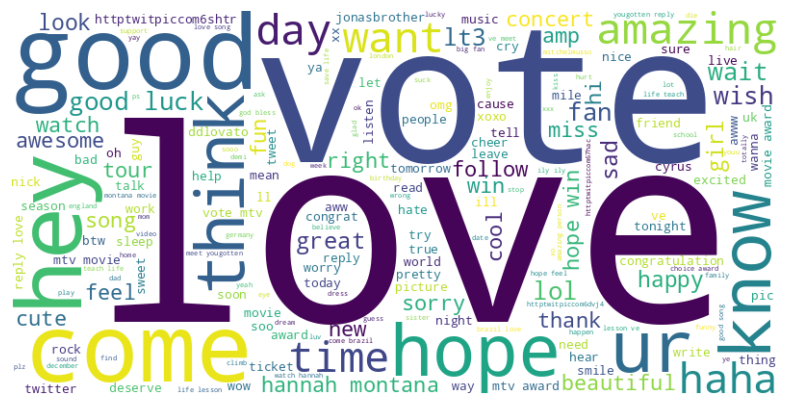

[('love', 834), ('good', 457), ('vote', 418), ('come', 326), ('hope', 286), ('like', 248), ('win', 244), ('award', 217), ('movie', 213), ('amazing', 191)]


In [152]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(list_corpus_mileycyrus))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
word_counts = Counter(list_corpus_mileycyrus)
top_10 = word_counts.most_common(10)
print(top_10)

**¿Razón por la que citan a ese usuario?**

Según el top 10 de palabras, expresan su amor al artista, invitan a votar para que gane un premio y sus fans esperan que llegue a su localidad.

**@TOMMCFLY**

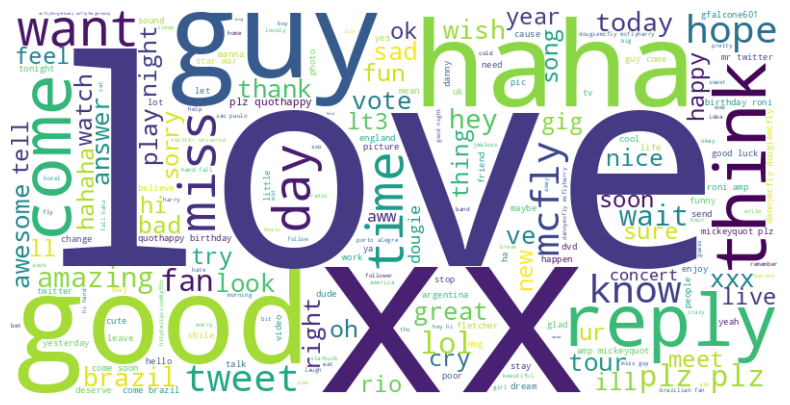

[('love', 460), ('come', 370), ('good', 359), ('xx', 303), ('guy', 286), ('haha', 259), ('like', 255), ('reply', 242), ('plz', 225), ('brazil', 222)]


In [153]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(list_corpus_tommcfly))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
word_counts = Counter(list_corpus_tommcfly)
top_10 = word_counts.most_common(10)
print(top_10)

**¿Razón por la que citan a ese usuario?**

Según el top 10 de palabras, salduan y expresan su amor al artista. Pareciera que sus fans insisten en que llegue a Brasil

**@DDLOVATO**

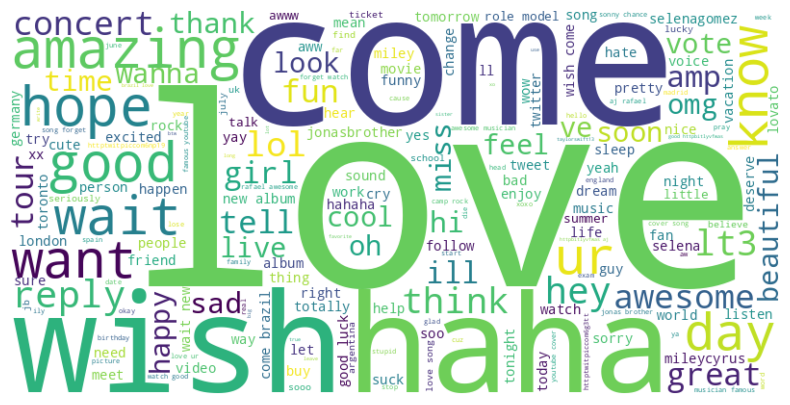

[('love', 600), ('come', 348), ('good', 266), ('wish', 252), ('wait', 224), ('like', 224), ('hope', 215), ('want', 184), ('amazing', 183), ('ur', 181)]


In [154]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(list_corpus_ddlovato))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
word_counts = Counter(list_corpus_ddlovato)
top_10 = word_counts.most_common(10)
print(top_10)

**¿Razón por la que citan a ese usuario?**

Según el top 10 de palabras, expresan su amor al artista. Sus fans esperan y desean que de conciertos en sus localidades.

## **Problema 2**

In [111]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img, array_to_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
import cv2
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model

### **Path carpetas con imagenes**

In [37]:
base_path='/content/drive/MyDrive/ProyectoFinal/'

### **Image Augmentation**

Se realiza image augmentation para el train y el test

In [41]:
data_train_path=base_path+'Train_Set/'

train_data_generator=ImageDataGenerator(
    rescale=1/255.,
    zoom_range=0.3,
    horizontal_flip=True,
    vertical_flip=True,
    shear_range=0.5,

)

train_data_flow=train_data_generator.flow_from_directory(
    directory=data_train_path,
    target_size=(64,64),
    batch_size=32,
    class_mode='categorical'
)
print(train_data_flow.class_indices)

Found 2468 images belonging to 6 classes.
{'FreshBanana': 0, 'FreshCarrot': 1, 'FreshMango': 2, 'FreshPotato': 3, 'FreshStrawberry': 4, 'FreshTomato': 5}


In [ ]:
data_test_path=base_path+'Test_Set/'

test_data_generator=ImageDataGenerator(
    rescale=1/255.,
)

test_data_flow=test_data_generator.flow_from_directory(
    directory=data_test_path,
    target_size=(64,64),
    batch_size=32,
    class_mode='categorical'
)


Found 1200 images belonging to 6 classes.


### **Red Neuronal Convolucional 1**

* Capa Convolucional (imagenes de 64 x 64, 3 canales)
* Capa de Max Pooling (de 2x2)
* Capa Flatten (vector unidimensional)
* Capa Densa con activación relu
* Capa de salida (6 clases)

In [ ]:
cnn_v1=Sequential()

cnn_v1.add(Conv2D(input_shape=(64,64,3),filters=64,kernel_size=(3,3),activation='relu'))

cnn_v1.add(MaxPool2D(pool_size=(2,2)))

cnn_v1.add(Flatten())

cnn_v1.add(Dense(units=128,activation='relu'))

cnn_v1.add(Dense(units=6,activation='softmax'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Compilación y entrenamiento**

In [ ]:
cnn_v1.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
cnn_v1.fit(train_data_flow,
           steps_per_epoch=20,
           epochs=10,
           validation_steps=100,
           validation_data=test_data_flow)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.1700 - loss: 3.2178

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


20/20 ━━━━━━━━━━━━━━━━━━━━ 451s 21s/step - accuracy: 0.1701 - loss: 3.1833 - val_accuracy: 0.2275 - val_loss: 1.7312
Epoch 2/10


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


20/20 ━━━━━━━━━━━━━━━━━━━━ 87s 5s/step - accuracy: 0.2769 - loss: 1.6873 - val_accuracy: 0.3900 - val_loss: 1.5329
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 68s 4s/step - accuracy: 0.4383 - loss: 1.4939 - val_accuracy: 0.3833 - val_loss: 1.4312
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.5177 - loss: 1.3181 - val_accuracy: 0.5633 - val_loss: 1.1856
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 119s 3s/step - accuracy: 0.6155 - loss: 1.1625 - val_accuracy: 0.5417 - val_loss: 1.2441
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.6357 - loss: 1.1139 - val_accuracy: 0.5433 - val_loss: 1.1823
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.6640 - loss: 0.9511 - val_accuracy: 0.4367 - val_loss: 1.4078
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 804ms/step - accuracy: 0.5937 - loss: 1.0612 - val_accuracy: 0.5192 - val_loss: 1.1466
Epoch 9/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - accuracy: 0.7126 - loss: 0.8594 - val_accuracy: 0.4958 - val_loss: 1.1926

**Almacenamiento del modelo**

In [ ]:
cnn_v1.save('/content/drive/MyDrive/ProyectoFinal/Models/cnn_v1.h5')

### **Red Neuronal Convolucional 2**

* 1ra Capa Convolucional (imagenes de 64 x 64, 3 canales)
* 1ra Capa de Max Pooling (de 2x2)
* 2da Capa Convolucional (64 filtros)
* 2da Capa de Max Pooling (de 2x2)
* Capa Flatten (vector unidimensional)
* Capa Densa (64 neuronas con activación relu)
* Capa de salida (6 clases, activación softmax)

In [ ]:
cnn_v2 = Sequential()
cnn_v2.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
cnn_v2.add(MaxPool2D(pool_size=(2, 2)))
cnn_v2.add(Conv2D(64,(3, 3), activation='relu'))
cnn_v2.add(MaxPool2D(pool_size=(2, 2)))
cnn_v2.add(Flatten())
cnn_v2.add(Dense(64, activation='relu'))
cnn_v2.add(Dense(6, activation='softmax'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Compilación y entrenamiento**

In [ ]:
cnn_v2.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
cnn_v2.fit(
    train_data_flow,
    steps_per_epoch=20,
    epochs=15,
    validation_data=test_data_flow,
    validation_steps=100
)

Epoch 1/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.5657 - loss: 1.1541 - val_accuracy: 0.5575 - val_loss: 1.2148
Epoch 2/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.5740 - loss: 1.1062 - val_accuracy: 0.5542 - val_loss: 1.1506
Epoch 3/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 18s 952ms/step - accuracy: 0.6603 - loss: 1.0013 - val_accuracy: 0.6258 - val_loss: 1.0647
Epoch 4/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 750ms/step - accuracy: 0.6559 - loss: 0.9381 - val_accuracy: 0.5933 - val_loss: 1.0804
Epoch 5/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 29s 996ms/step - accuracy: 0.6837 - loss: 0.8802 - val_accuracy: 0.5800 - val_loss: 1.1320
Epoch 6/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.6486 - loss: 0.9030 - val_accuracy: 0.6942 - val_loss: 0.9102
Epoch 7/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.6834 - loss: 0.8111 - val_accuracy: 0.5158 - val_loss: 1.3818
Epoch 8/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 742ms/step - accuracy: 0.7568 - loss: 0.7002 - val_accuracy: 0.6283

**Almacenamiento del modelo**

In [ ]:
cnn_v2.save('/content/drive/MyDrive/ProyectoFinal/Models/cnn_v2.h5')

### **Red Neuronal Convolucional 3**

Tipo AlexNet

* 1ra Capa Convolucional (imagenes de 64 x 64, 3 canales)
* 1ra Capa de Max Pooling (de 2x2)

* 2da Capa Convolucional (16 filtros)
* 2da Capa de Max Pooling (de 2x2)

* Capa Flatten (vector unidimensional)
* 1ra Capa Densa (128 neuronas con activación relu)
* 2da Capa Densa (64 neuronas con activación relu)

* Capa de salida (6 clases, activación softmax)

In [ ]:
cnn_v3 = Sequential()


cnn_v3.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
cnn_v3.add(MaxPool2D(pool_size=(2, 2)))


cnn_v3.add(Conv2D(16, (3, 3), activation='relu'))
cnn_v3.add(MaxPool2D(pool_size=(2, 2)))


cnn_v3.add(Flatten())
cnn_v3.add(Dense(128, activation='relu'))
cnn_v3.add(Dense(64, activation='relu'))
cnn_v3.add(Dense(6, activation='softmax'))





/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Compilación y entrenamiento**

In [ ]:
cnn_v3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
cnn_v3.fit(
    train_data_flow,
    steps_per_epoch= 50,
    epochs=30,
    validation_data=test_data_flow,
    validation_steps=100
)

Epoch 1/30
 1/50 ━━━━━━━━━━━━━━━━━━━━ 2:09 3s/step - accuracy: 0.7812 - loss: 0.6354

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


50/50 ━━━━━━━━━━━━━━━━━━━━ 34s 640ms/step - accuracy: 0.8300 - loss: 0.4911 - val_accuracy: 0.6867 - val_loss: 0.7927
Epoch 2/30
 1/50 ━━━━━━━━━━━━━━━━━━━━ 7s 146ms/step - accuracy: 0.8438 - loss: 0.3945

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


50/50 ━━━━━━━━━━━━━━━━━━━━ 20s 402ms/step - accuracy: 0.8417 - loss: 0.4785 - val_accuracy: 0.6892 - val_loss: 0.7514
Epoch 3/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 31s 587ms/step - accuracy: 0.8422 - loss: 0.4232 - val_accuracy: 0.6633 - val_loss: 0.8232
Epoch 4/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 18s 358ms/step - accuracy: 0.8355 - loss: 0.4174 - val_accuracy: 0.7658 - val_loss: 0.6225
Epoch 5/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 33s 623ms/step - accuracy: 0.8806 - loss: 0.3588 - val_accuracy: 0.8075 - val_loss: 0.6088
Epoch 6/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 20s 400ms/step - accuracy: 0.8532 - loss: 0.4148 - val_accuracy: 0.7925 - val_loss: 0.5913
Epoch 7/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 31s 585ms/step - accuracy: 0.8806 - loss: 0.3384 - val_accuracy: 0.7842 - val_loss: 0.6791
Epoch 8/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 18s 359ms/step - accuracy: 0.8883 - loss: 0.3347 - val_accuracy: 0.8192 - val_loss: 0.4992
Epoch 9/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 64s 587ms/step - accuracy: 0.8725 - loss: 0.3631 - val_accuracy: 0.792

**Almacenamiento del modelo**

In [ ]:
cnn_v3.save('/content/drive/MyDrive/ProyectoFinal/Models/cnn_v3.h5')

### **Predicciones del modelo**

El modelo que mejor realizó las predicciones fue el numero 2.

In [147]:
def predic_fruta_verdura(direccion_modelo_seleccionado,direccion_imagen):
  model=load_model(direccion_modelo_seleccionado)
  imagen_predict=cv2.imread(direccion_imagen)
  imagen_predict=cv2.cvtColor(imagen_predict,cv2.COLOR_BGR2RGB)
  plt.imshow(imagen_predict)
  img=cv2.resize(imagen_predict,(64,64))
  img=img.astype('float32')/255.
  img=np.expand_dims(img,axis=0)
  prediccion_cnn1=model.predict(img)
  labels = ['Banano', 'Zanahoria', 'Mango','Papa','Fresa','Tomate']
  print(labels[np.argmax(prediccion_cnn1)])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
Banano


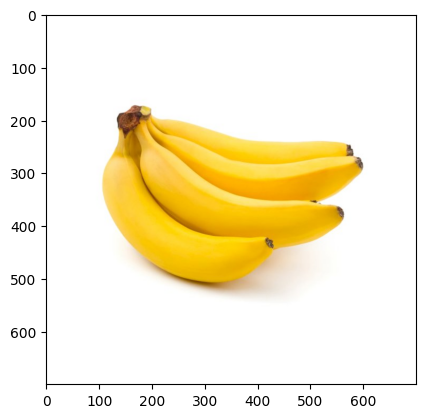

In [150]:
predic_fruta_verdura('/content/drive/MyDrive/ProyectoFinal/Models/cnn_v2.h5','/content/drive/MyDrive/ProyectoFinal/predicts/banano.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
Zanahoria


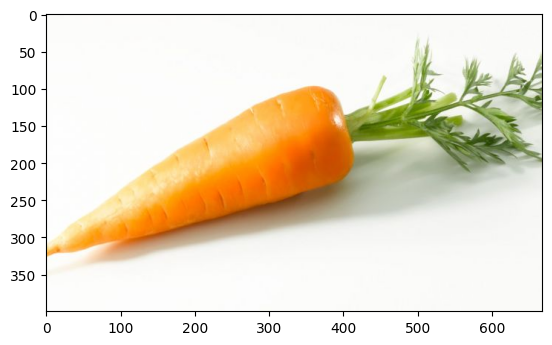

In [149]:
predic_fruta_verdura('/content/drive/MyDrive/ProyectoFinal/Models/cnn_v2.h5','/content/drive/MyDrive/ProyectoFinal/predicts/zanahoria.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
Mango


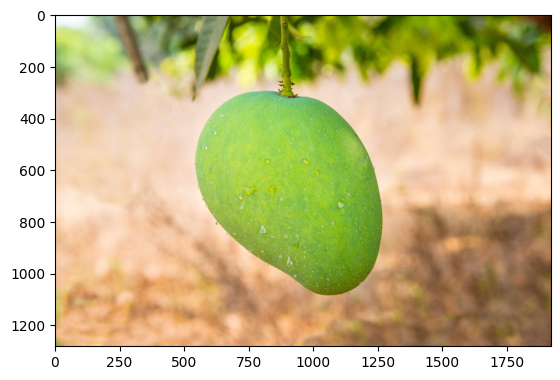

In [151]:
predic_fruta_verdura('/content/drive/MyDrive/ProyectoFinal/Models/cnn_v2.h5','/content/drive/MyDrive/ProyectoFinal/predicts/mangoverde.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Fresa


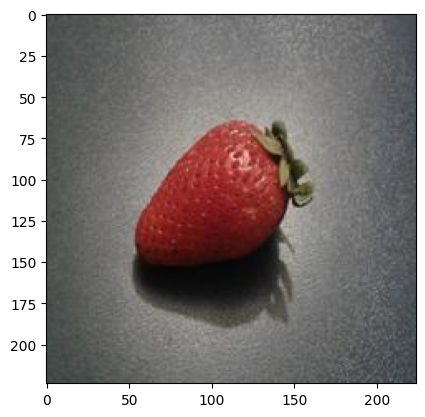

In [148]:
predic_fruta_verdura('/content/drive/MyDrive/ProyectoFinal/Models/cnn_v2.h5','/content/drive/MyDrive/ProyectoFinal/predicts/Strawberry.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step
Tomate


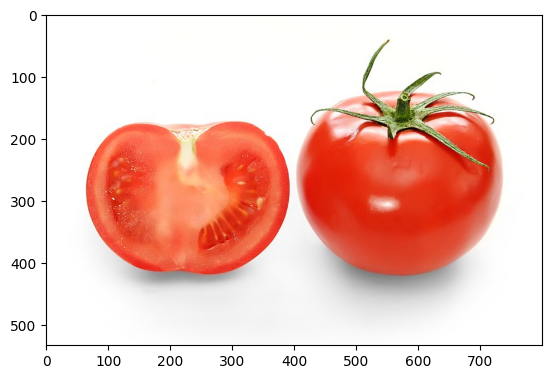

In [153]:
predic_fruta_verdura('/content/drive/MyDrive/ProyectoFinal/Models/cnn_v2.h5','/content/drive/MyDrive/ProyectoFinal/predicts/Tomate.jpg')

**¿Por qué cree que la CNN que seleccionó funciona mejor que
otras?**

A pesar de que el modelo 3 tuvo un entrenamiento con el accuracy más alto, al momento de predecir no fue tan certero, quizá pueda ser que se sobreajustó el modelo y cuando se ingresaron imagenes diferentes falló en su predición. Se seleccionó el modelo 2 porque fue el que mejor hizo las predicciones y en su entrenamiento tuvo valores regulares llegando a un accuracy de 0.80 aproximadamente.


